In [1]:
# set current directory to the parent directory
import os
os.chdir('..')

Dimensions of data (30, 100)
Dimensions of lat and pressure (100,) (30,)
First 5 lats and first 5 pressures [-70.   -69.75 -69.5  -69.25 -69.  ] [ 0.  5. 10. 20. 30.]
Dimensions of data (30, 88)
Dimensions of lat and pressure (88,) (30,)
First 5 lats and first 5 pressures [-67.   -66.75 -66.5  -66.25 -66.  ] [ 0.  5. 10. 20. 30.]
Dimensions of data (30, 100)
Dimensions of lat and pressure (100,) (30,)
First 5 lats and first 5 pressures [-70.   -69.75 -69.5  -69.25 -69.  ] [ 0.  5. 10. 20. 30.]
Dimensions of data (30, 88)
Dimensions of lat and pressure (88,) (30,)
First 5 lats and first 5 pressures [-67.   -66.75 -66.5  -66.25 -66.  ] [ 0.  5. 10. 20. 30.]


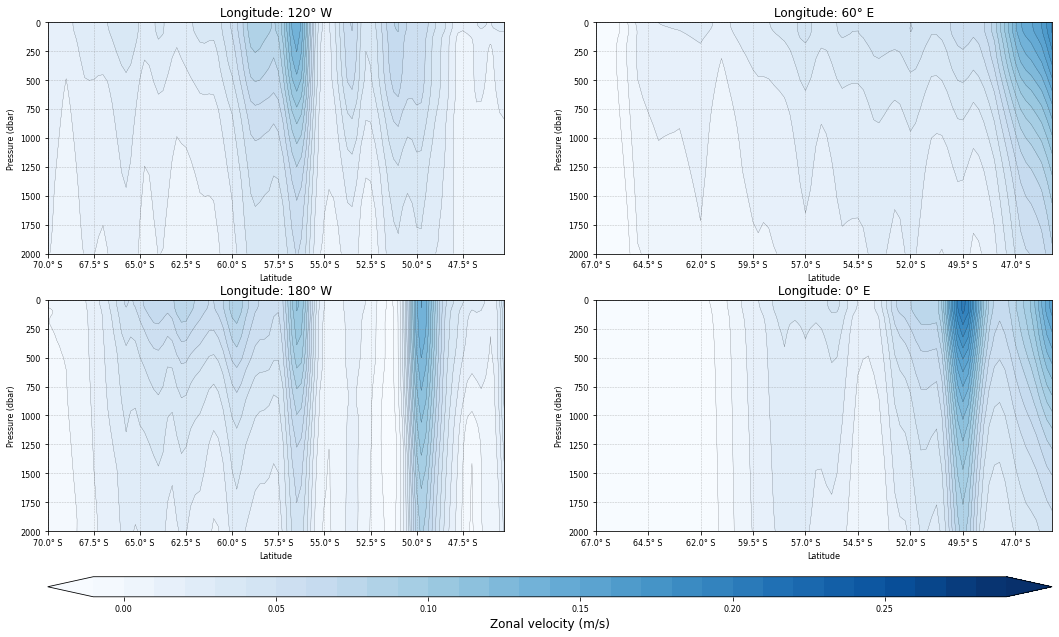

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Open the .nc file at timemean_velocity_product_nu72version.nc
ds_vel_mean = xr.open_dataset('timemean_velocity_product_nu72version.nc')

# Plot sections of the SO at multiple longitudes 
#   -- latitude on the xaxis, depth on the y axis, and plot u (zonal) velocity with contourf and contour
def plot_section(ax, ds, cbar_levels, xticks, xticklabels, cmap='Blues', var_name='u', ):
    data = ds[var_name].values.T  # need to transpose data to be indexed as (latitude, pressure)
    lat = ds['latitude'].values.T

    print('Dimensions of data', data.shape)
    print('Dimensions of lat and pressure', lat.shape, ds.pressure.values.shape)
    print('First 5 lats and first 5 pressures', lat[:5], ds.pressure.values[:5])

    LATS, PRESSURES = np.meshgrid(lat, ds['pressure'].values) 

    # Plot filled contours (returns QuadContourSet)
    contourf = ax.contourf(
        LATS, PRESSURES, data,
        levels=cbar_levels,
        cmap=cmap,
        extend='both',
        # alpha=0.97
    )

    # Add contour lines in black
    ax.contour(
        LATS, PRESSURES, data,
        levels=cbar_levels, #np.arange(-0.5, 0.6, 0.1),
        colors='k',
        linewidths=0.2,
        alpha=0.75,
        linestyles = 'solid',
    )

    # ax.set_xlim(35, 58)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, fontsize=8)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_xlabel('Latitude', fontsize=8)
    ax.set_ylabel('Pressure (dbar)', fontsize=8)
    # for label in ax.get_yticklabels():
    #     label.set_rotation(30)

    ax.grid(color='gray', alpha=0.5, linestyle='--', linewidth=0.5, zorder=5)
    ax.invert_yaxis()
    ax.set_title('')

    return contourf

transect_lons = [-120, 60, -180, 0]
lat_ranges_default = np.arange(-70,-45,0.25)
fig,ax = plt.subplots(2,2,figsize=(18, 12),)
ax = ax.flatten()

for i, lon in enumerate(transect_lons):
    if lon == 60 or lon == 0: # These particular longitude transects have a reduced latitude range due to Antarctica continent
        lat_ranges = np.arange(-67, -45, 0.25)
    else:
        lat_ranges = lat_ranges_default

    # get the data for the transect
    ds = ds_vel_mean.sel(longitude=lon, latitude=slice(np.min(lat_ranges), np.max(lat_ranges)))

    # plot the contours
    cbar_levels = np.arange(-0.01, 0.3, 0.01) # None # using None will use matplotlib's default way to determine contour levels 
    xticks = lat_ranges[::10]
    xticklabels = [f'{-tick}° S' for tick in xticks]
    var_name='u' # can change to 'v' for meridional vel
    contour = plot_section(ax[i], ds, cbar_levels, xticks, xticklabels)

    # label subplot with the lon value
    # if lon is negative, remove minus sign and add 'W' for west
    if lon < 0:
        lon_label = f'{-lon}° W'
    else:
        lon_label = f'{lon}° E'
    ax[i].set_title(f'Longitude: {lon_label}', fontsize=12)

    # Add one colorbar for all subplots
    if i == 0:
        cbar = fig.colorbar(contour, 
                            ax=ax, 
                            orientation='horizontal', pad=0.07, aspect=50)
        cbar.set_label('Zonal velocity (m/s)', fontsize=12)
        cbar.ax.tick_params(labelsize=8)
        cbar.set_ticks(np.arange(0, 0.3, 0.05))

fig.patch.set_facecolor('white')
fig.savefig('velocity_sections.png', dpi=350, bbox_inches='tight')